Decision Tree
===
1. Information entropy
2. Tree structure
3. Evaluation
4. Random Forest Methods

In [35]:
# Using ID3 Decision-Tree Algorithm to predict Amount od Sales
import pandas as pd 

inputfile = '../data/sales_data.xls'
data = pd.read_excel(inputfile, index_col = '序号') 

data[data == '好'] = 1
data[data == '是'] = 1
data[data == '高'] = 1
data[data != 1] = -1
x = data.iloc[:,:3].as_matrix().astype(int)
y = data.iloc[:,3].as_matrix().astype(int)

from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC(criterion='entropy') 
dtc.fit(x, y) 


from sklearn.tree import export_graphviz
x = pd.DataFrame(x)
from sklearn.externals.six import StringIO
x = pd.DataFrame(x)
with open("tree.dot", 'w') as f:
  f = export_graphviz(dtc, feature_names = x.columns, out_file = f)

In [42]:
with open("tree1.dot", 'w') as f:
  f = export_graphviz(dtc, feature_names = ["Weather","Weekend","Promotion"], out_file = f)

Visualize the Decision Tree
---
**Note:** output is in list, and graph[0] is the data we want.

In [31]:
from sklearn import tree
import pydot

labels
---
```
1: Whether weekend or not
0: Weather good or bad
2: Any promotion
```

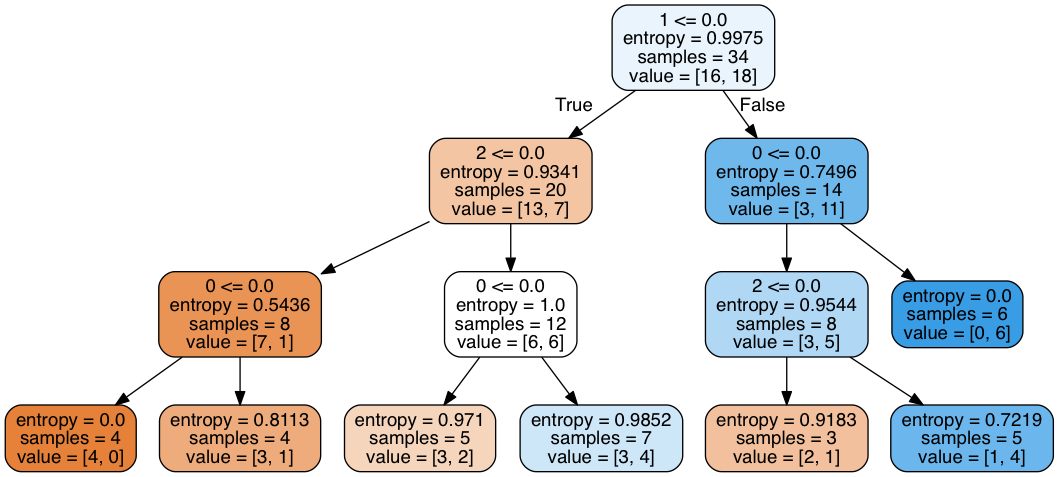

In [32]:

dot_data = StringIO() 
tree.export_graphviz(dtc, out_file=dot_data, feature_names=x.columns,filled=True, 
                                 rounded=True) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_png('tree.png') 
from IPython.core.display import Image 
Image(filename='tree.png')

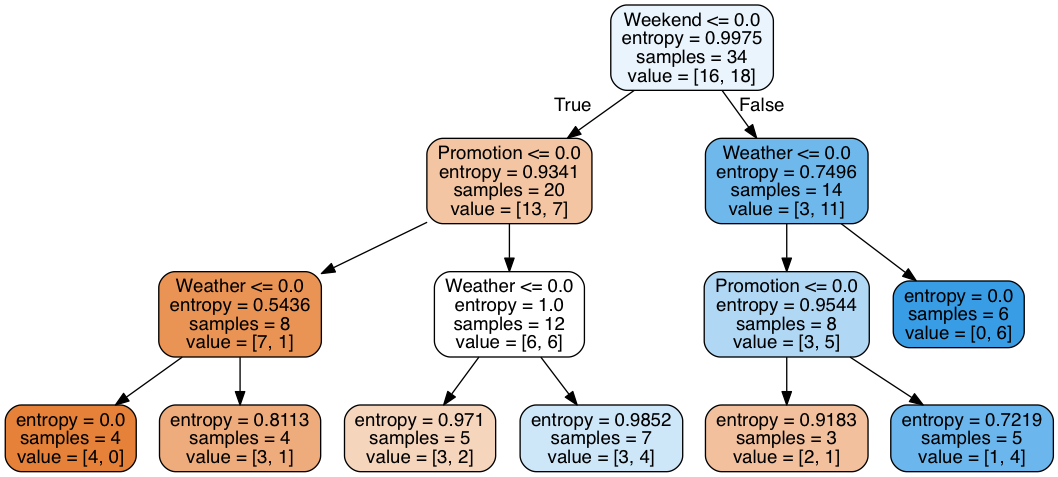

In [43]:

dot_data = StringIO() 
tree.export_graphviz(dtc, out_file=dot_data, feature_names=["Weather","Weekend","Promotion"],filled=True, 
                                 rounded=True) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_png('tree.png') 
from IPython.core.display import Image 
Image(filename='tree.png')

In the first level:

$$I_w(18,16)=entropy= -\frac{18}{34}\ln\frac{18}{34}-\frac{16}{34}\ln\frac{16}{34}=0.9975$$
And 
```
               Sales good     Sales bad
Weather good:     11              6
Weather bad:       7             10
```
This got
$$ E_{Weather}= \frac{17}{34}I(11,6)+ \frac{17}{34}I(7,10)=0.957$$
And 
$$ Gian_{weather}=I(18,16)-E_{Weather}\approx0.04$$
Others are
$$ Gian_{Weekend}=I(18,16)-E_{Weekend}\approx0.139\\
   Gian_{promotion}=I(18,16)-E_{promotion}\approx0.127\\
$$
This suggests that the feature, **whether weekend or not**, is on the top of the tree.

Result
---
1. The right stem
   - ```[Weekday] yes -> [Weather] good -> value = [0,6] Sales is good, (6>0)```,
   - ```[Weekday] yes -> [Weather] bad -> [promotion] yes -> value = [1,4] Sales is good, (4>1)```,
   - ```[Weekday] yes -> [Weather] bad -> [promotion] no -> value = [2,1] Sales is bad, (1<2)```.
-  The left stem
   - ```[Weekday] no -> [promotion] yes -> [Weather] good -> value = [3,4] Sales is good, (4>3)```,
   - ```[Weekday] no -> [promotion] yes -> [Weather] bad -> value = [3,2] Sales is bad, (2<3)```,
   - ```[Weekday] no -> [promotion] no -> [Weather] good -> value = [3,1] Sales is bad, (1<3)```,
   - ```[Weekday] no -> [promotion] no -> [Weather] bad -> value = [4,0] Sales is bad, (0<4)```, 

Accuracy
---
Let's measure Accuracy, precision, recall, f1 in the training set, (x,y) here. 
Here only Decision Tree and Random Forest Methods are considered.

Accuracy:0.765 

Classification report
             precision    recall  f1-score   support

         -1       0.75      0.75      0.75        16
          1       0.78      0.78      0.78        18

avg / total       0.76      0.76      0.76        34
 

Confusion matrix
[[12  4]
 [ 4 14]] 



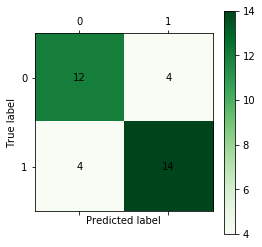

In [47]:
from sklearn import metrics
def measure_performance(X,y,method="dtc", show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    if method=="dtc":
       y_pred=dtc.predict(X) 
       score=dtc.score(X,y)
    else:
       y_pred=rfc.predict(X) 
       score=rfc.score(X,y)
    if show_accuracy:
        #print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")
        print("Accuracy:{0:.3f}".format(score),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
        
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")
        cm_plot(y,y_pred).show() 
        
measure_performance(x,y, method="dtc",show_classification_report=True, show_confusion_matrix=True)

In [46]:
dtc.score(x,y)

0.76470588235294112

In [ ]:
def splitData(features):
    titanic_predictors = titanic[features].as_matrix()
    titanic_labels = titanic["Survived"].as_matrix()

    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(titanic_predictors, titanic_labels, random_state=1, test_size=0.5)
    return XTrain, XTest, yTrain, yTest

In [ ]:
all_features = x.columns

XTrain, XTest, yTrain, yTest = splitData(all_features)
decisionTree = tree.DecisionTreeClassifier()
decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
renderTree(decisionTree, all_features)

For this example, we will use an extreme case of cross- validation, named leave-one-out cross-validation. For each instance in the training sample, we train on the rest of the sample, and evaluate the model built on the only instance left out. After performing as many classifications as training instances, we calculate the accuracy simply as the proportion of times our method correctly predicted the class of the left-out instance, and found it is a little lower (as we expected) than the resubstitution accuracy on the training set.

In [39]:
from sklearn.cross_validation import cross_val_score, LeaveOneOut
from scipy.stats import sem
import numpy as np

def loo_cv(X_train,y_train,dtc):
    # Perform Leave-One-Out cross validation
    # We are preforming 1313 classifications!    
    loo = LeaveOneOut(X_train[:].shape[0])
    scores=np.zeros(X_train[:].shape[0])

    for train_index,test_index in loo:
        X_train_cv, X_test_cv= X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv= y_train[train_index], y_train[test_index]
        dtc = dtc.fit(X_train_cv,y_train_cv)
        y_pred=dtc.predict(X_test_cv)
        scores[test_index]=metrics.accuracy_score(y_test_cv.astype(int), y_pred.astype(int))
    print ("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores))



Improving Decision Trees: Random Forests
---
A great way to counteract overfitting is to combine multiple decision trees that were generated with some randomness and let them vote on the result. This approach is an ensemble learning technique, as it combines multiple learning algorithms. 

Accuracy:0.735 

Classification report
             precision    recall  f1-score   support

         -1       0.82      0.56      0.67        16
          1       0.70      0.89      0.78        18

avg / total       0.75      0.74      0.73        34
 

Confusion matrix
[[ 9  7]
 [ 2 16]] 



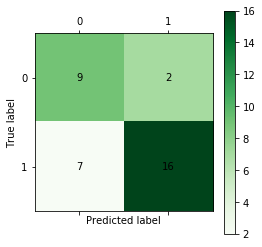

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,random_state=33)
rfc.fit(x,y)
#loo_cv(x,y,dtc)
measure_performance(x,y, method="rfc",show_classification_report=True, show_confusion_matrix=True)

Another option: Gradient Boosting
---
Another Ensemble method that can be useful is Boosting: here, rather than looking at 200 (say) parallel estimators, We construct a chain of 200 estimators which iteratively refine the results of the previous estimator. The idea is that by sequentially applying very fast, simple models, we can get a total model error which is better than any of the individual pieces.

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=.2)
clf.fit(x,y)

print(clf.score(x,y))


0.394262566138


In [53]:
x,y

(    0  1  2
 0  -1  1  1
 1  -1  1  1
 2  -1  1  1
 3  -1 -1  1
 4  -1  1  1
 5  -1 -1  1
 6  -1  1 -1
 7   1  1  1
 8   1  1 -1
 9   1  1  1
 10  1  1  1
 11  1  1  1
 12  1  1  1
 13 -1  1  1
 14  1 -1  1
 15  1 -1  1
 16  1 -1  1
 17  1 -1  1
 18  1 -1 -1
 19 -1 -1 -1
 20 -1 -1  1
 21 -1 -1  1
 22 -1 -1  1
 23 -1 -1 -1
 24 -1  1 -1
 25  1 -1  1
 26  1 -1  1
 27 -1 -1 -1
 28 -1 -1 -1
 29  1 -1 -1
 30 -1  1 -1
 31  1 -1  1
 32  1 -1 -1
 33  1 -1 -1,
 array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
         1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]))

In [54]:
clf.predict(x)

array([ 0.6       ,  0.6       ,  0.6       , -0.2       ,  0.6       ,
       -0.2       , -0.33333333,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  0.6       ,  0.14285714,
        0.14285714,  0.14285714,  0.14285714, -0.5       , -1.        ,
       -0.2       , -0.2       , -0.2       , -1.        , -0.33333333,
        0.14285714,  0.14285714, -1.        , -1.        , -0.5       ,
       -0.33333333,  0.14285714, -0.5       , -0.5       ])